In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [29]:
series = np.sin((0.1*np.arange(400))**2)

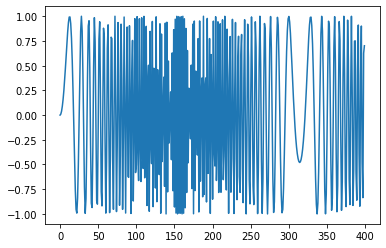

In [30]:
plt.plot(series)
plt.show()

In [31]:
T = 10

X = []
y = []

for t in range(len(series)-T):
    X.append(series[t:t+T])
    y.append(series[t+T])

In [32]:
X = np.expand_dims(X, -1)
y = np.array(y)

In [41]:
# many-to-one architecture 

i = Input(shape=(T, 1))
h = LSTM(10)(i)
d = Dense(1)(h)

model = Model(i, d)

model.compile(optimizer=Adam(lr=0.1), loss='mse')

In [42]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [43]:
N = X.shape[0]

r = model.fit( X[:N//2], y[:N//2], validation_data=(X[N//2:], y[N//2:]), epochs=80 )

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 14s 71ms/sample - loss: 0.5435 - val_loss: 0.5871
Epoch 2/80
195/195 [==============================] - 1s 5ms/sample - loss: 0.5128 - val_loss: 0.6162
Epoch 3/80
195/195 [==============================] - 1s 4ms/sample - loss: 0.4882 - val_loss: 0.4716
Epoch 4/80
195/195 [==============================] - 1s 6ms/sample - loss: 0.3835 - val_loss: 0.4999
Epoch 5/80
195/195 [==============================] - 1s 4ms/sample - loss: 0.3661 - val_loss: 0.5421
Epoch 6/80
195/195 [==============================] - 1s 4ms/sample - loss: 0.2143 - val_loss: 0.2578
Epoch 7/80
195/195 [==============================] - 1s 4ms/sample - loss: 0.1417 - val_loss: 0.2281
Epoch 8/80
195/195 [==============================] - 1s 5ms/sample - loss: 0.1310 - val_loss: 0.1976
Epoch 9/80
195/195 [==============================] - 1s 5ms/sample - loss: 0.1107 - val_loss: 0.1903
Epoch 10/80
195/195 [=============

195/195 [==============================] - 0s 2ms/sample - loss: 0.0048 - val_loss: 0.0542


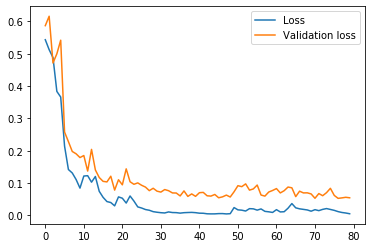

In [44]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

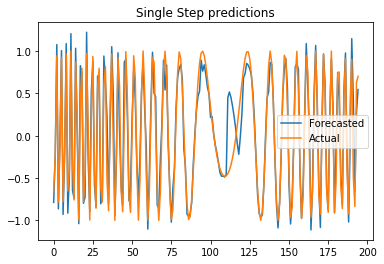

In [45]:
# Single-step predictions

y_hat = model.predict(X[N//2:])

plt.plot(y_hat, label='Forecasted')
plt.plot(y[N//2:], label='Actual')
plt.legend()
plt.title('Single Step predictions')
plt.show()

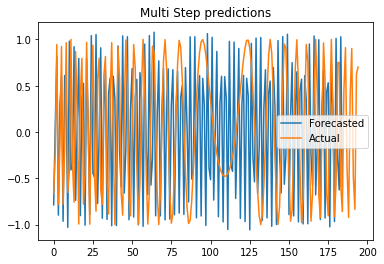

In [46]:
# Multi-step predictions

y_hat = []

X_useful = series[N//2 : N//2+10]

for i in range(N//2-10):
    x_last = model.predict(X_useful[i:i+10].reshape(1, 10, 1))[0, 0]
    y_hat.append(x_last)
    X_useful = np.append(X_useful, x_last)
    

plt.plot(y_hat, label='Forecasted')
plt.plot(y[N//2:], label='Actual')
plt.legend()
plt.title('Multi Step predictions')
plt.show()

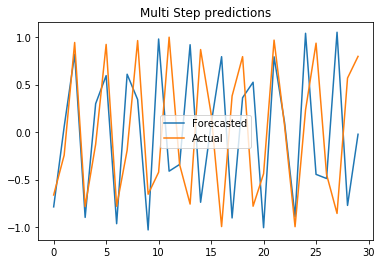

In [48]:
plt.plot(y_hat[:30], label='Forecasted')
plt.plot(y[N//2:N//2+30], label='Actual')
plt.legend(loc='best')
plt.title('Multi Step predictions')
plt.show()